Objective:
This analysis explores how Bitcoin market sentiment (Fear/Greed) affects trader behavior and performance on Hyperliquid. 
We analyze whether sentiment influences:
- Profitability (PnL, win rate)
- Trading behavior (position size, frequency)
- Trader segments (frequent vs infrequent traders)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")



In [73]:
sentiment = pd.read_csv("sentiment.csv")
trades = pd.read_csv("traders.csv")

print(sentiment.shape)
print(trades.shape)


(2644, 4)
(211224, 16)


In [74]:
print(sentiment.isna().sum())
print(trades.isna().sum())


timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [75]:

print("Duplicates sentiment:", sentiment.duplicated().sum())
print("Duplicates trades:", trades.duplicated().sum())


Duplicates sentiment: 0
Duplicates trades: 0


In [76]:
sentiment['date'] = pd.to_datetime(sentiment['date'])


In [77]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [78]:
trades.columns = trades.columns.str.strip().str.lower()
sentiment.columns = sentiment.columns.str.strip().str.lower()
print(trades.columns)


Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp'],
      dtype='object')


In [79]:
trades['timestamp ist'] = pd.to_datetime(
    trades['timestamp ist'],
    dayfirst=True)

trades['date'] = trades['timestamp ist'].dt.date


In [80]:
sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    dayfirst=True
).dt.date


In [81]:
data = pd.merge(trades, sentiment, on='date', how='left')
data.head()


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [82]:
# Win flag
data['win'] = data['closed pnl'] > 0

# Size group
data['size_group'] = np.where(data['size usd'] > data['size usd'].median(),'Large','Small')


In [83]:
data.groupby('classification')['win'].mean()


classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64

In [84]:
trades_per_account = data.groupby('account').size()


In [85]:
data.groupby('classification')['closed pnl'].mean()

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: closed pnl, dtype: float64

In [86]:
data.groupby('classification')['size usd'].mean()


classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: size usd, dtype: float64

In [87]:
data.groupby('classification').size()

classification
Extreme Fear     21400
Extreme Greed    39992
Fear             61837
Greed            50303
Neutral          37686
dtype: int64

In [88]:
daily_pnl = data.groupby(['account','date'])['closed pnl'].sum().reset_index()
daily_pnl.head()


,account,date,closed pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


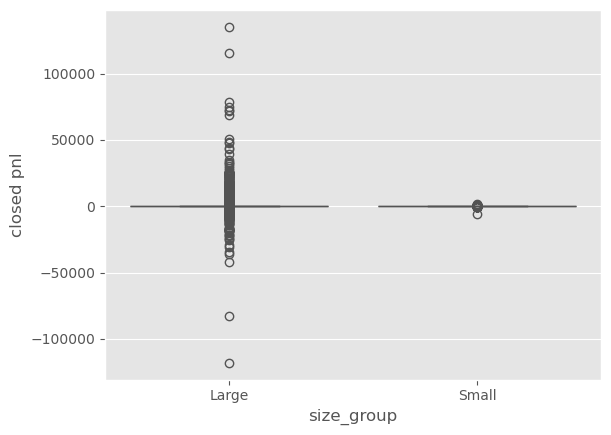

In [89]:
data['size_group'] = np.where(data['size usd']>data['size usd'].median(),'Large','Small')
sns.boxplot(x='size_group', y='closed pnl', data=data)
plt.show()


Insight — Trade Size vs Risk

Large trade sizes lead to higher variability in PnL.
Traders placing large trades experience both large gains and large losses, while small traders show more stable outcomes.

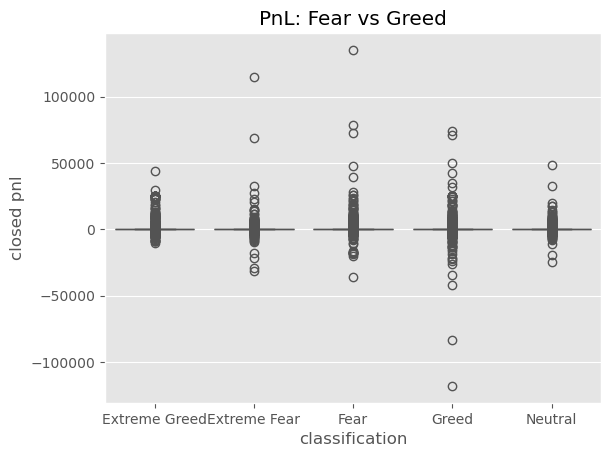

In [90]:
import seaborn as sns
sns.boxplot(x='classification', y='closed pnl', data=data)
plt.title("PnL: Fear vs Greed")
plt.show()


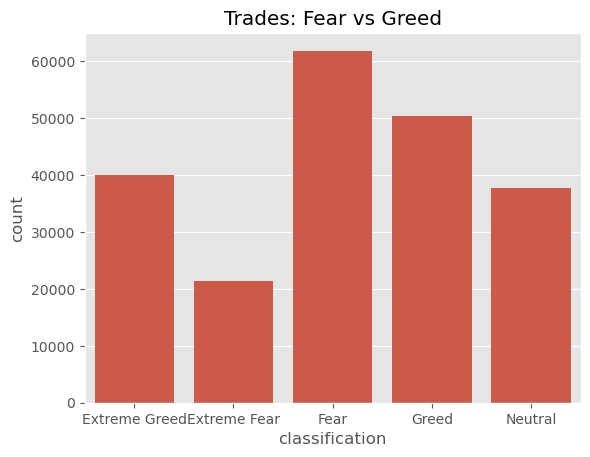

In [91]:
sns.countplot(x='classification', data=data)
plt.title("Trades: Fear vs Greed")
plt.show()


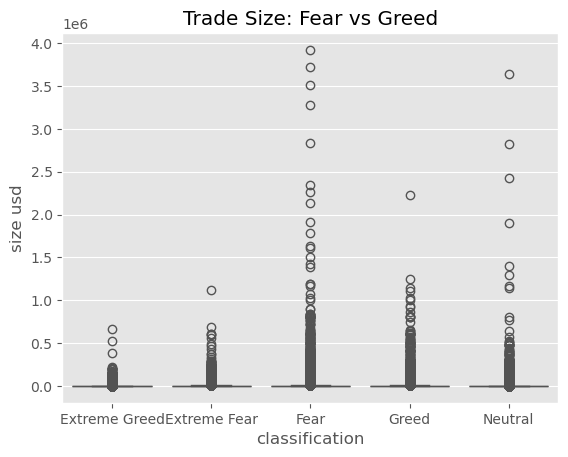

In [92]:
sns.boxplot(x='classification', y='size usd', data=data)
plt.title("Trade Size: Fear vs Greed")
plt.show()


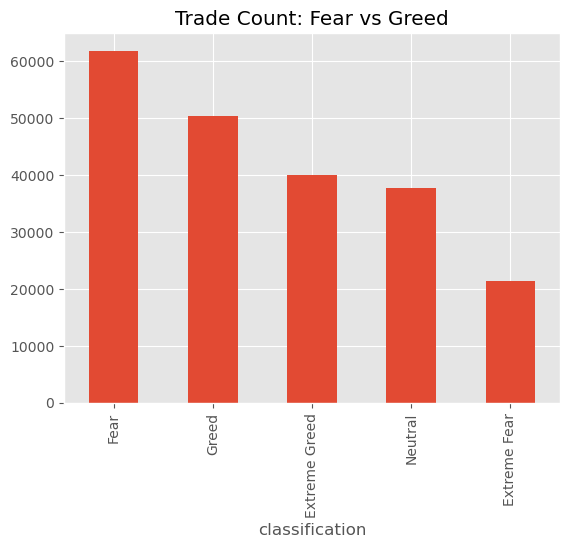

In [93]:
data['classification'].value_counts().plot(kind='bar')
plt.title("Trade Count: Fear vs Greed")
plt.show()


Insights-
      1. Market Fear drives activity- Trade frequency is highest during Fear periods.This suggests traders react      strongly to market uncertainty and volatility.
      2. Fear increases risk-taking- Trade sizes and PnL variability are larger during Fear and Extreme Fear.This shows traders take bigger risks in volatile markets.
      3. Greed leads to stability- Greed days show more concentrated PnL distribution, suggesting more stable but smaller outcomes.

Strategy Ideas-
Strategy 1- During Fear periods, use smaller position sizing to manage volatility risk.
Strategy 2- During Greed periods, consistent moderate trading may yield steadier returns.
Strategy 3 -Avoid overtrading during Extreme Fear due to high PnL swings.

In [94]:
consistency = data.groupby('account')['closed pnl'].std().sort_values()
consistency.head(10)


account
0xa0feb3725a9335f49874d7cd8eaad6be45b27416     68.234904
0x8477e447846c758f5a675856001ea72298fd9cb5     68.613041
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f     72.561195
0x47add9a56df66b524d5e2c1993a43cde53b6ed85     88.292842
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    113.269353
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    134.073473
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    172.520773
0x92f17e8d81a944691c10e753af1b1baae1a2cd0d    220.387735
0x2c229d22b100a7beb69122eed721cee9b24011dd    255.829091
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    264.123880
Name: closed pnl, dtype: float64

Some traders show stable performance regardless of sentiment.


Conclusion
This analysis explored how Bitcoin market sentiment (Fear vs Greed) influences trader behavior and performance on Hyperliquid. The results indicate that market sentiment has a meaningful relationship with both trading activity and risk-taking behavior.
During Fear and Extreme Fear periods, trading activity increases and traders tend to place larger trades, leading to higher variability in PnL. This suggests that volatility attracts participation, but also exposes traders to greater risk. In contrast, Greed periods show more stable PnL distributions and relatively moderate trading behavior, indicating a more controlled trading environment.
Overall, the findings suggest that sentiment-driven markets impact not only how often traders trade, but also how much risk they are willing to take. Traders who adapt their position sizing and frequency based on sentiment conditions may better manage risk and improve consistency. Therefore, incorporating sentiment signals into trading decisions can serve as a useful layer in developing smarter and more disciplined trading strategies.

Predictive Modeling


In [95]:
data['profit_bucket'] = (data['closed pnl'] > 0).astype(int)


In [96]:
features = ['size usd']

X = data[features]
y = data['profit_bucket']


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.5870990649781039


Simple logistic regression shows that trade size has some predictive power for profitability, though performance is limited due to few features

Trader Clustering


In [98]:
trader_stats = data.groupby('account').agg(
    avg_size=('size usd','mean'),
    total_pnl=('closed pnl','sum'),
    trade_count=('closed pnl','count')
)


In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

trader_stats['cluster'] = kmeans.fit_predict(trader_stats)


C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [100]:
trader_stats.groupby('cluster').mean()


,avg_size,total_pnl,trade_count
cluster,,,
0,7860.612688,6.153023e+05,11514.750000
1,4971.426192,7.413310e+04,4570.681818
2,9998.731054,1.871806e+06,9275.500000


Clustering reveals groups such as high-frequency traders, high-risk traders, and low-activity traders

In [101]:
data.to_csv("final_data.csv", index=False)
